# Naudojamos bibliotekos:

In [47]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [28]:
failo_kelias = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
prezidento_duomenys = pd.read_csv(failo_kelias)

In [8]:
# Aprašome visus skaitinius stulpelius
print("Prezidento skaitinių stulpelių aprašymas:")
skaitiniu_aprasymas = prezidento_duomenys.describe()
print(skaitiniu_aprasymas)

# Aprašome visus tekstinius ir kategorinius stulpelius
print("\nPrezidento tekstinių ir kategorinių stulpelių apžvalga:")
tekstiniai_kategoriniai_stulpeliai = prezidento_duomenys.select_dtypes(include=["object"]).columns
for stulpelis in tekstiniai_kategoriniai_stulpeliai:
    print(f"\nStulpelis: {stulpelis}")
    print(f"Unikalios reikšmės: {prezidento_duomenys[stulpelis].nunique()}")
    print(f"Dažniausios reikšmės:\n{prezidento_duomenys[stulpelis].value_counts().head(5)}")

Prezidento skaitinių stulpelių aprašymas:
              year   state_fips    state_cen     state_ic  candidatevotes  \
count  4287.000000  4287.000000  4287.000000  4287.000000    4.287000e+03   
mean   1999.080942    28.616982    53.665034    39.754840    3.119076e+05   
std      14.220014    15.616459    26.029189    22.772216    7.648011e+05   
min    1976.000000     1.000000    11.000000     1.000000    0.000000e+00   
25%    1988.000000    16.000000    33.000000    22.000000    1.177000e+03   
50%    2000.000000    28.000000    53.000000    42.000000    7.499000e+03   
75%    2012.000000    41.000000    81.000000    61.000000    1.992415e+05   
max    2020.000000    56.000000    95.000000    82.000000    1.111025e+07   

         totalvotes     version  notes  electoral_votes  partija_numeric  ...  \
count  4.287000e+03      4287.0    0.0      4287.000000      4287.000000  ...   
mean   2.366924e+06  20210113.0    NaN        11.020527         1.694892  ...   
std    2.465008e+06  

# Skaitiniai stulpeliai

### 1. Kandidato balsai (candidatevotes)
Platus balsų diapazonas – nuo kandidatų, surinkusių vos kelis balsus, iki milijonų balsų.
Mediana rodo, kad dauguma kandidatų surenka santykinai mažą balsų skaičių, o kelios didžiausios reikšmės yra didelio populiarumo kandidatai.

In [9]:
# Pakeičiame mokslinę notaciją į standartinę
pd.options.display.float_format = "{:,.0f}".format
print(prezidento_duomenys["candidatevotes"].describe())

count        4,287
mean       311,908
std        764,801
min              0
25%          1,177
50%          7,499
75%        199,242
max     11,110,250
Name: candidatevotes, dtype: float64


### 2. Bendras balsų skaičius (totalvotes)
Maksimalus balsų skaičius (17,500,880) rodo aktyvius rinkimus didžiausioje valstijoje - Kalifornijoje.


In [10]:
pd.options.display.float_format = "{:,.0f}".format
print(prezidento_duomenys["totalvotes"].describe())

count        4,287
mean     2,366,924
std      2,465,008
min        123,574
25%        652,274
50%      1,569,180
75%      3,033,118
max     17,500,881
Name: totalvotes, dtype: float64


### 3. Darbingumas (Bendras darbingumas)
Rodo didelį skirtumą tarp valstijų pagal ekonominį aktyvumą, pvz., mažos valstijos kaip Vermontas (60 tūkst.) prieš dideles kaip Kalifornija (15 mln.).

In [11]:
pd.options.display.float_format = "{:,.0f}".format
print(prezidento_duomenys["Bendras darbingumas"].describe())

count        3,885
mean     2,218,532
std      2,479,696
min         59,222
25%        580,018
50%      1,532,447
75%      2,592,339
max     15,095,912
Name: Bendras darbingumas, dtype: float64


### 4. Gamyba (Gamyba)
Didelės reikšmės gamyboje atspindi stiprias pramonės valstijas, pvz., Mičiganą.

In [12]:
pd.options.display.float_format = "{:,.0f}".format
print(prezidento_duomenys["Gamyba"].describe())

count     3,885
mean    158,083
std     157,639
min           0
25%      30,123
50%     122,793
75%     239,684
max     908,584
Name: Gamyba, dtype: float64


# Tekstiniai stulpeliai

### Valstija (state)
Unikalios reikšmės: 51

Duomenyse yra visos 50 valstijų ir Kolumbijos apygarda.

### Detalūs partijų rezultatai (party_detailed)

Dažniausios reikšmės:

Respublikonai: 613 kartų

Demokratai: 612 kartų

Libertarai: 535 kartų

Nepriklausomi: 405 kartų

Žalieji (Green): 211 kartų

Aiškiai dominuoja Respublikonų ir Demokratų partijos, tačiau kandidatuoja ir kitos partijos.

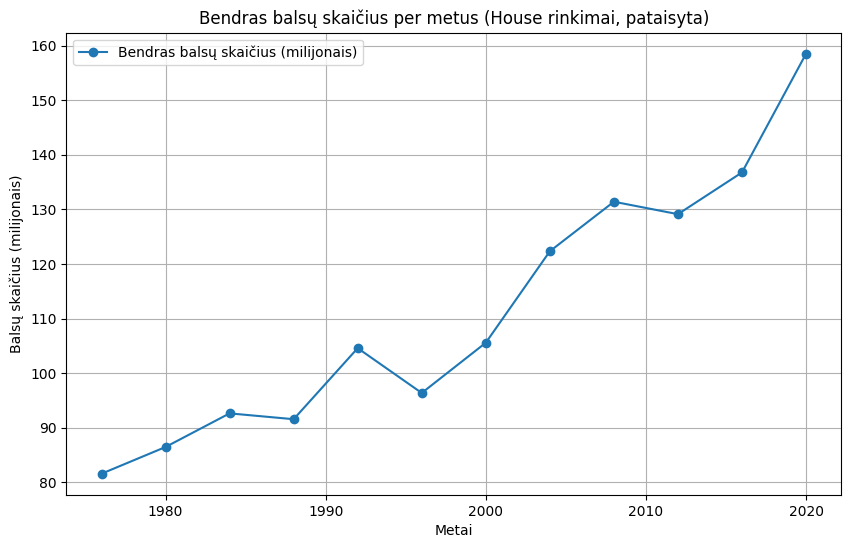

In [45]:
# Skaičiuojame bendrą balsų skaičių pagal kandidatus kiekvienais metais
balsai_pagal_kandidatus = prezidento_duomenys.groupby(["year"])["candidatevotes"].sum()

# Konvertuojame į milijonus
balsai_pagal_kandidatus_milijonais = balsai_pagal_kandidatus / 1e6

# Vizualizacija
plt.figure(figsize=(10, 6))
plt.plot(balsai_pagal_kandidatus_milijonais.index, balsai_pagal_kandidatus_milijonais.values, marker="o", label="Bendras balsų skaičius (milijonais)")
plt.title("Bendras balsų skaičius per metus (House rinkimai, pataisyta)")
plt.xlabel("Metai")
plt.ylabel("Balsų skaičius (milijonais)")
plt.grid()
plt.legend()
plt.show()


Bendras balsų skaičius svyruoja nuo ~80 mln. (1976 m.) iki ~160 mln. (2020 m.).

Nuo 1976 m. iki 2020 m. balsų skaičius beveik padvigubėjo. Tai rodo tiek gyventojų skaičiaus augimą, tiek rinkėjų aktyvumo didėjimą.

2020 m. rekordas:
Matome didžiausią balsų skaičių 2020 m., kai buvo užfiksuotas didžiausias rinkėjų aktyvumas istorijoje (~160 mln.).

Stabilūs laikotarpiai:
Nuo 1990 iki 2000 m. ir 2008 iki 2016 m. augimas buvo lėtesnis, tačiau vėliau sparčiai pagreitėjo.

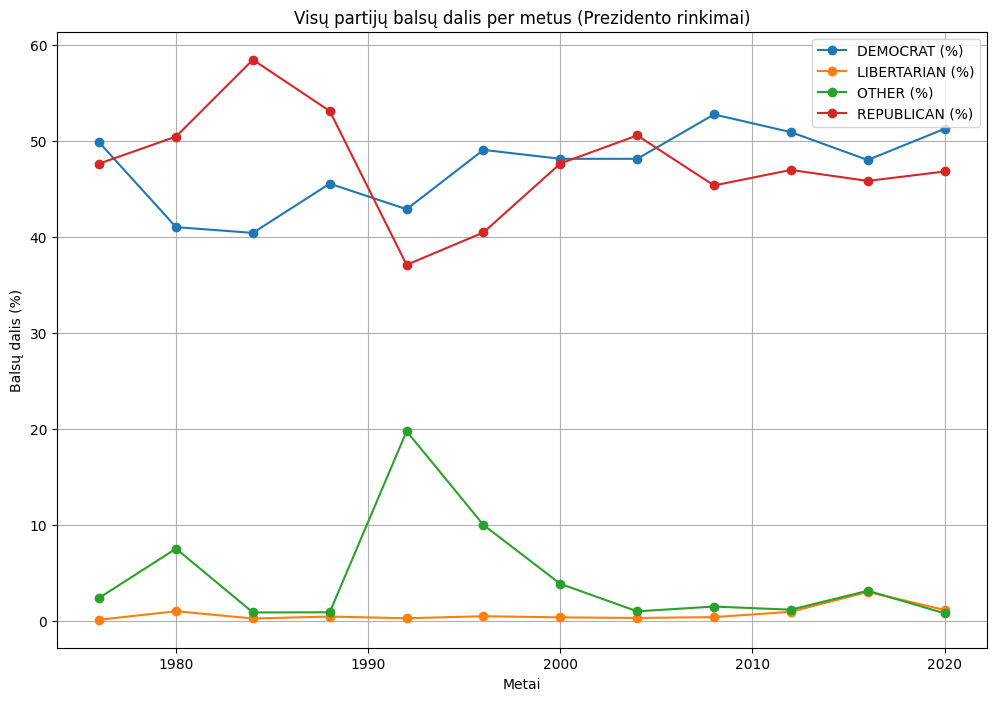

In [ ]:
# Filtruojame tik reikalingus duomenis
partijos = prezidento_duomenys[["year", "party_simplified", "candidatevotes"]]
partijos = partijos.groupby(["year", "party_simplified"])["candidatevotes"].sum().unstack()

# Skaičiuojame balsų dalis procentais (įskaitant visas partijas)
partijos_procentai = partijos.div(partijos.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
for partija in partijos_procentai.columns:
    plt.plot(partijos_procentai.index, partijos_procentai[partija], marker="o", label=f"{partija} (%)")

plt.title("Visų partijų balsų dalis per metus (Prezidento rinkimai)")
plt.xlabel("Metai")
plt.ylabel("Balsų dalis (%)")
plt.grid()
plt.legend()
plt.show()

Demokratų ir Respublikonų partijos užima didžiausią dalį balsų kiekvienais rinkimais.

Trečiųjų partijų poveikis:
LIBERTARIAN partijos balsų dalis išlieka nedidelė (~1-2 %) ir reikšmingai neauga.

OTHER (kitos partijos) turėjo didesnį poveikį 1992 m. (Ross Perot kandidatuojant), kai jų balsų dalis pasiekė reikšmingą piką.

Ilgalaikės tendencijos:
Demokratų ir Respublikonų balsų dalis yra santykinai stabilios, tačiau trečiųjų partijų reikšmė pastebimai sumažėjo nuo 1992 m.

Šis grafikas rodo, kad JAV prezidento rinkimų sistema yra stipriai dvipartinė, o trečiųjų partijų poveikis dažniausiai minimalus.

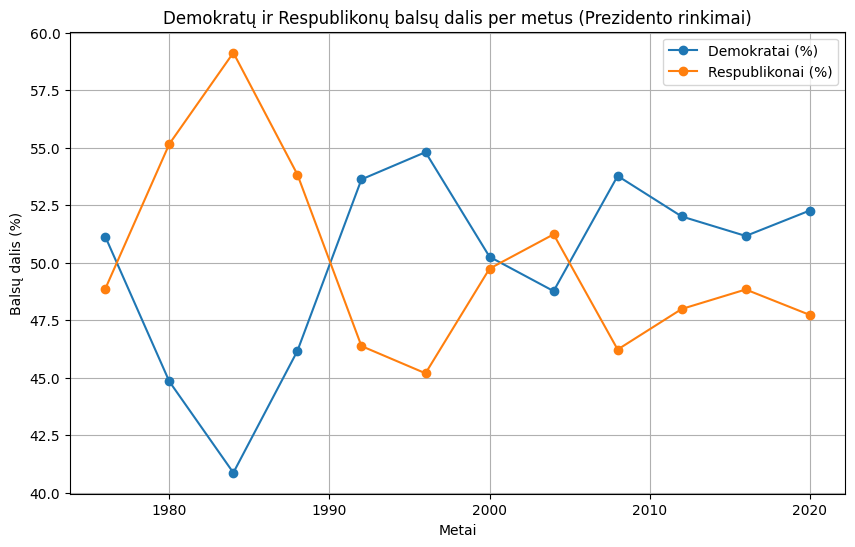

In [ ]:
# Agreguojame duomenis pagal metus, valstijas ir partijas
prezidento_duomenys_agreguoti = prezidento_duomenys.groupby(["year", "state", "party_simplified"])["candidatevotes"].max().reset_index()

# Filtruojame tik Demokratų ir Respublikonų partijas
partijos = ["DEMOCRAT", "REPUBLICAN"]
duomenys_partijos = prezidento_duomenys_agreguoti[prezidento_duomenys_agreguoti["party_simplified"].isin(partijos)]

# Skaičiuojame balsų dalis procentais
populiarumas = (
    duomenys_partijos.groupby(["year", "party_simplified"])["candidatevotes"]
    .sum()
    .unstack()
)
populiarumas_procentai = populiarumas.div(populiarumas.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
plt.plot(populiarumas_procentai.index, populiarumas_procentai["DEMOCRAT"], marker="o", label="Demokratai (%)")
plt.plot(populiarumas_procentai.index, populiarumas_procentai["REPUBLICAN"], marker="o", label="Respublikonai (%)")
plt.title("Demokratų ir Respublikonų balsų dalis per metus (Prezidento rinkimai)")
plt.xlabel("Metai")
plt.ylabel("Balsų dalis (%)")
plt.grid()
plt.legend()
plt.show()

Matomas reguliarūs švytuoklės efektas, kai viena partija laimi daugiau rinkėjų paramos vis kitus rinkimus.

Dviejų partijų sistema:
Demokratų ir Respublikonų balsų dalis beveik visada sudaro ~100 %, trečiųjų partijų poveikis yra minimalus.

Partijų konkurencija:

1976 m. dominavo Demokratų partija, tačiau 1980 m. Respublikonai perėmė lyderystę.

1992 m. Demokratų balsų dalis žymiai išaugo su Bill Clinton pergale, o Respublikonai atsigavo 2000 m.

2008 m. Barack Obama užtikrino reikšmingą Demokratų pranašumą.

2020 m. Demokratų dalis vėl išaugo su Joe Biden pergale.


Rinkėjų pasirinkimas smarkiai priklauso nuo kandidatų populiarumo ir tuometinės situacijos.

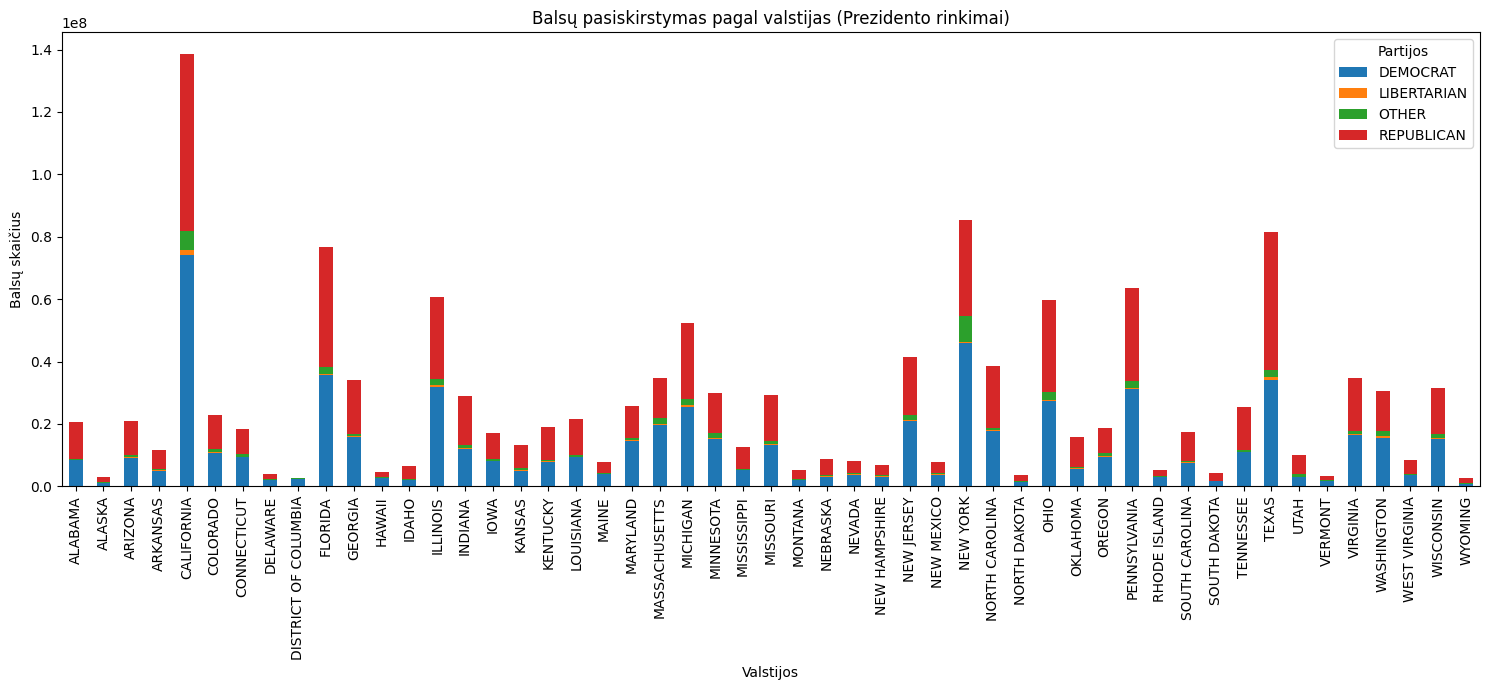

In [ ]:
# Prezidento duomenų analizė
state_votes_president = prezidento_duomenys.groupby(["state", "party_simplified"])["candidatevotes"].sum().unstack()
state_votes_president.plot(kind="bar", stacked=True, figsize=(15, 7))
plt.title("Balsų pasiskirstymas pagal valstijas (Prezidento rinkimai)")
plt.xlabel("Valstijos")
plt.ylabel("Balsų skaičius")
plt.legend(title="Partijos")
plt.tight_layout()
plt.show()


Didžiausios valstijos pagal balsus:
California, Texas, ir Florida surenka daugiausia balsų dėl didelės populiacijos ir strateginės svarbos rinkimuose.

Demokratų partija dominuoja vakaruose (California, Washington) ir šiaurės rytuose (New York, Massachusetts).

Respublikonai stiprūs pietuose (Texas, Alabama) ir vidurio vakaruose (Wyoming, North Dakota).

Libertarian ir kitos mažesnės partijos (OTHER) turi minimalų balsų procentą, tačiau jų įtaka pastebima kai kuriose valstijose, kaip New Mexico ar Maine.

Demokratų parama sutelkta miestų centruose, o Respublikonai dominuoja kaimiškuose ir mažesniuose regionuose.

Šis pasiskirstymas patvirtina istorines tendencijas, kur demokratų bastionai yra pakrančių valstijose, o respublikonų – pietuose ir vidurio vakaruose.

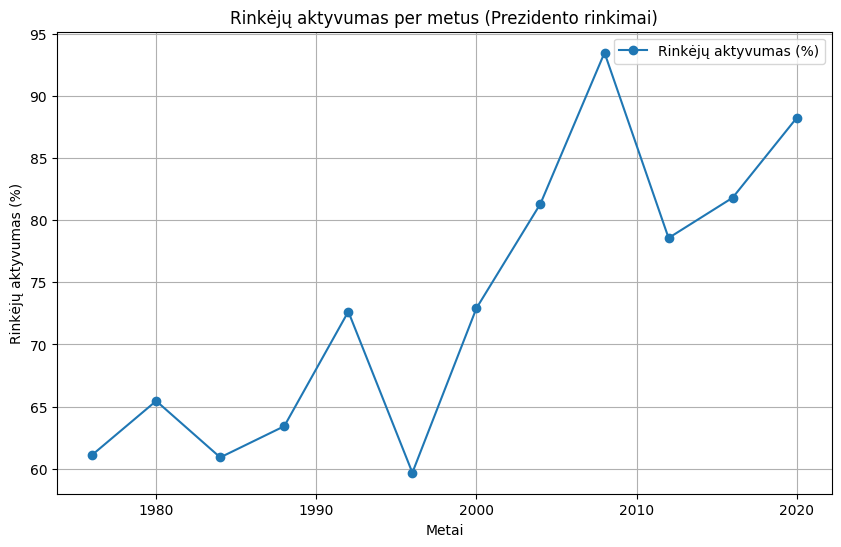

In [ ]:
# Apskaičiuojame rinkėjų aktyvumą
prezidento_duomenys["rinkejai_aktyvumas"] = prezidento_duomenys["totalvotes"] / prezidento_duomenys["Populiacija_viso"]

# Grupavimas pagal metus
rinkejai_aktyvumas_per_metus = prezidento_duomenys.groupby("year")["rinkejai_aktyvumas"].mean()

# Vizualizacija
plt.figure(figsize=(10, 6))
plt.plot(rinkejai_aktyvumas_per_metus.index, rinkejai_aktyvumas_per_metus.values * 100, marker="o", label="Rinkėjų aktyvumas (%)")
plt.title("Rinkėjų aktyvumas per metus (Prezidento rinkimai)")
plt.xlabel("Metai")
plt.ylabel("Rinkėjų aktyvumas (%)")
plt.grid()
plt.legend()
plt.show()


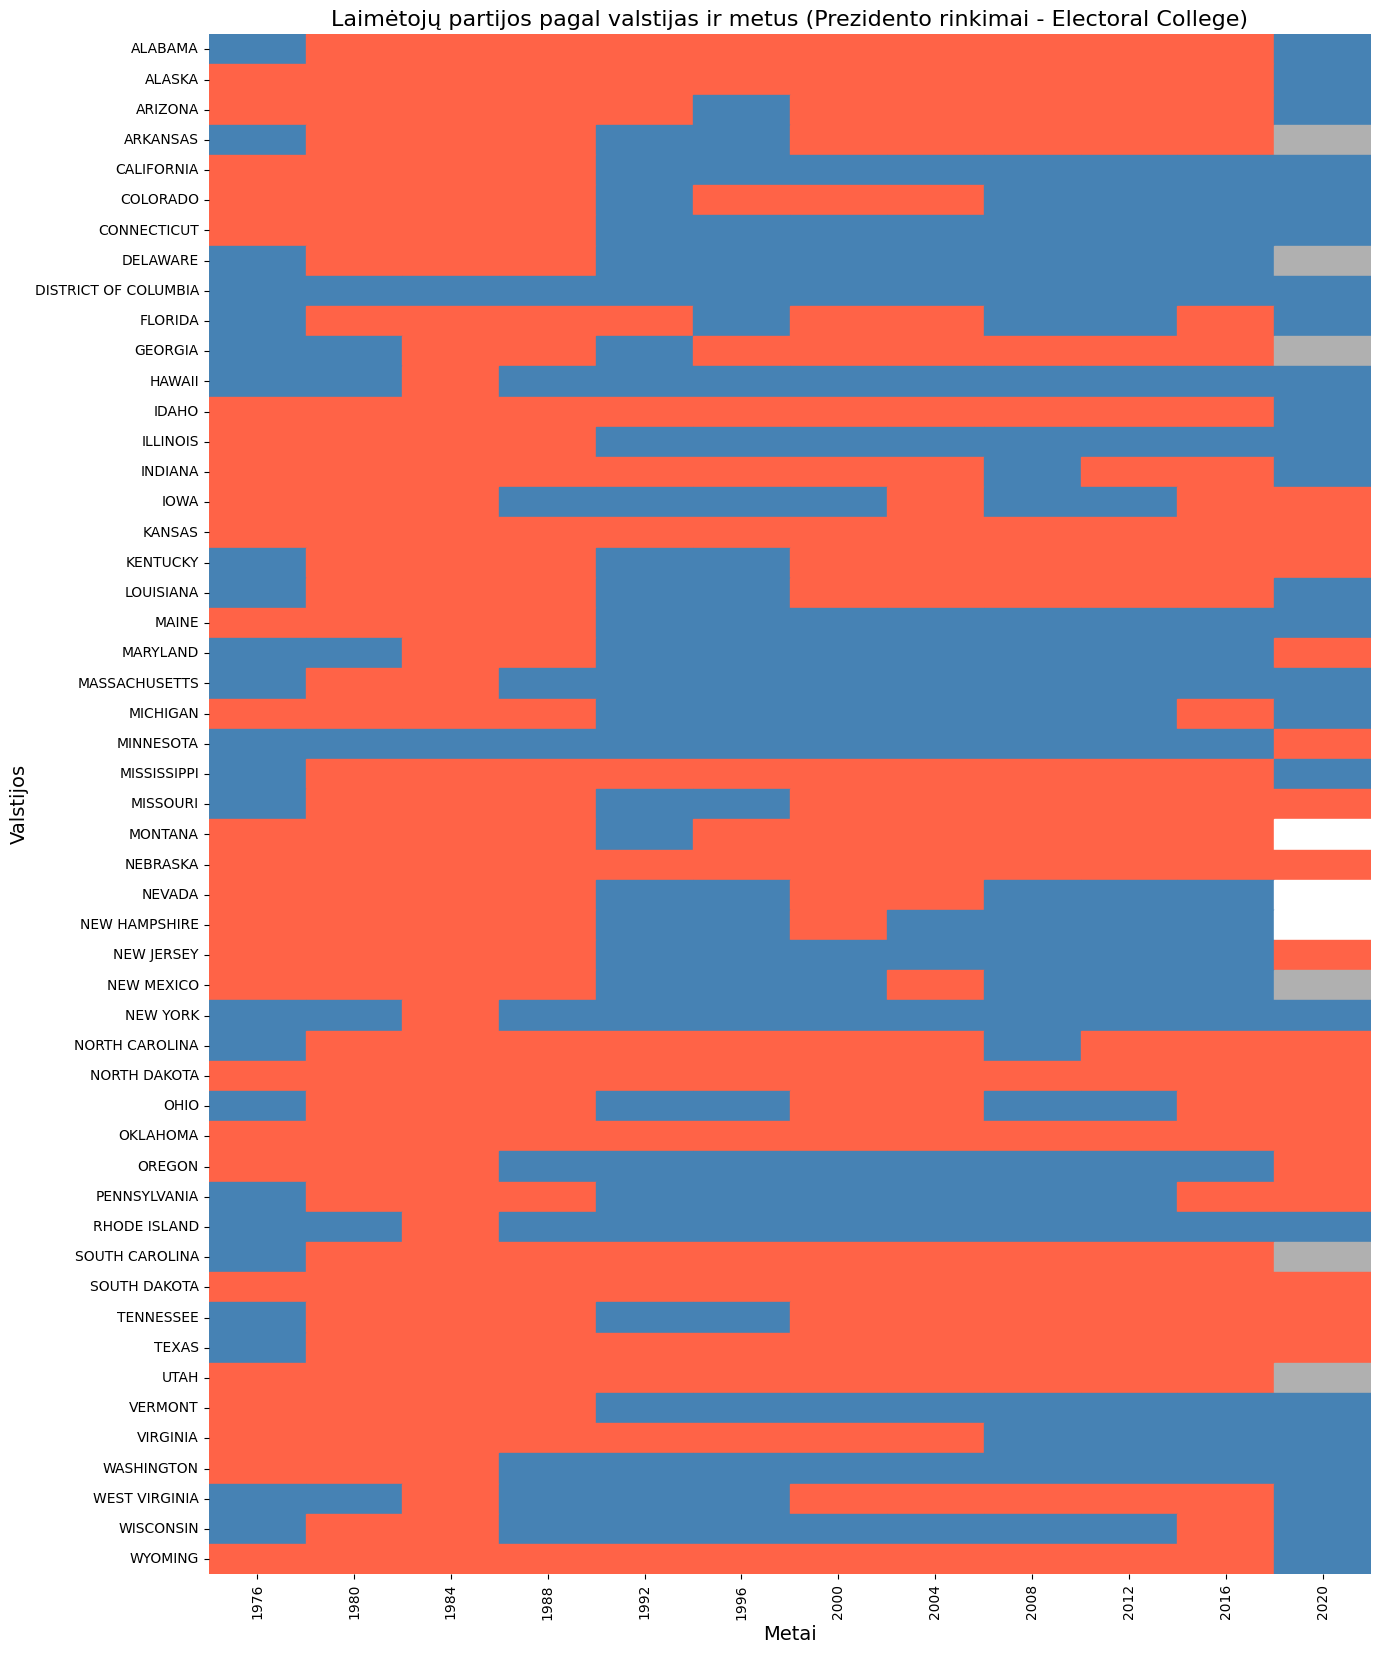

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure `electoral_votes` and `party_simplified` columns are available in the dataset
if "electoral_votes" not in prezidento_duomenys.columns:
    print("The dataset does not contain 'electoral_votes'. Please ensure it's included.")
else:
    # Determine the winner by state and year based on electoral votes
    electoral_winners = prezidento_duomenys.loc[
        prezidento_duomenys.groupby(["state", "year"])["electoral_votes"].idxmax()
    ][["state", "year", "party_simplified"]]

    # Create a pivot table for the heatmap
    heatmap_data_electoral = electoral_winners.pivot(index="state", columns="year", values="party_simplified")

    # Slightly brighter color mapping for parties
    party_colors = {
        "DEMOCRAT": "#4682B4",      # Brighter blue for Democrats
        "REPUBLICAN": "#FF6347",    # Brighter red for Republicans
        "OTHER": "#B0B0B0",         # Brighter gray for other parties
        None: "white"               # White for missing data
    }

    # Map colors for each party
    heatmap_colors_electoral = heatmap_data_electoral.apply(lambda row: row.map(lambda x: party_colors.get(x, "white")), axis=1)
    rgb_heatmap_electoral = heatmap_colors_electoral.apply(lambda row: row.map(lambda x: mcolors.to_rgb(x)), axis=1)

    # Plotting the heatmap
    fig, ax = plt.subplots(figsize=(15, 20))
    sns.heatmap(
        heatmap_data_electoral.isnull() * 0,
        cmap=mcolors.ListedColormap(["white"]),
        cbar=False,
        linewidths=0.5,
        linecolor="lightgray",
        ax=ax
    )

    for y in range(rgb_heatmap_electoral.shape[0]):
        for x in range(rgb_heatmap_electoral.shape[1]):
            color = rgb_heatmap_electoral.iloc[y, x]
            ax.add_patch(plt.Rectangle((x, y), 1, 1, color=color))

    # Titles and labels
    plt.title("Laimėtojų partijos pagal valstijas ir metus (Prezidento rinkimai - Electoral College)", fontsize=16)
    plt.xlabel("Metai", fontsize=14)
    plt.ylabel("Valstijos", fontsize=14)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()

Respublikonai (raudona): Dominuoja pietinėse ir vidurio vakaruose esančiose valstijose, pvz., Teksase, Alabamoje ir Kanzase.

Demokratai (mėlyna): Stipriausi šiaurės rytų ir vakarinėje pakrantėje, pvz., Niujorke, Kalifornijoje, Vašingtone.

1980–1990 metai: Respublikonai stipriai laimėjo didelėje dalyje valstijų.

2000 metai: Demokratų stiprėjimas vakarinėje pakrantėje ir šiaurės rytuose.

2016 ir 2020 metai: Labiau poliarizuoti rinkimai, kai keliose valstijose vyksta itin artima kova. Šiuose rinkimuose pasikeitė įvairios svyruojančios valstijos į vieną ir į kitą pusę.

C:\Users\Paulius\AppData\Local\Temp\ipykernel_18268\3908975946.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heatmap_colors = swing_state_data.fillna("NONE").applymap(party_colors.get)


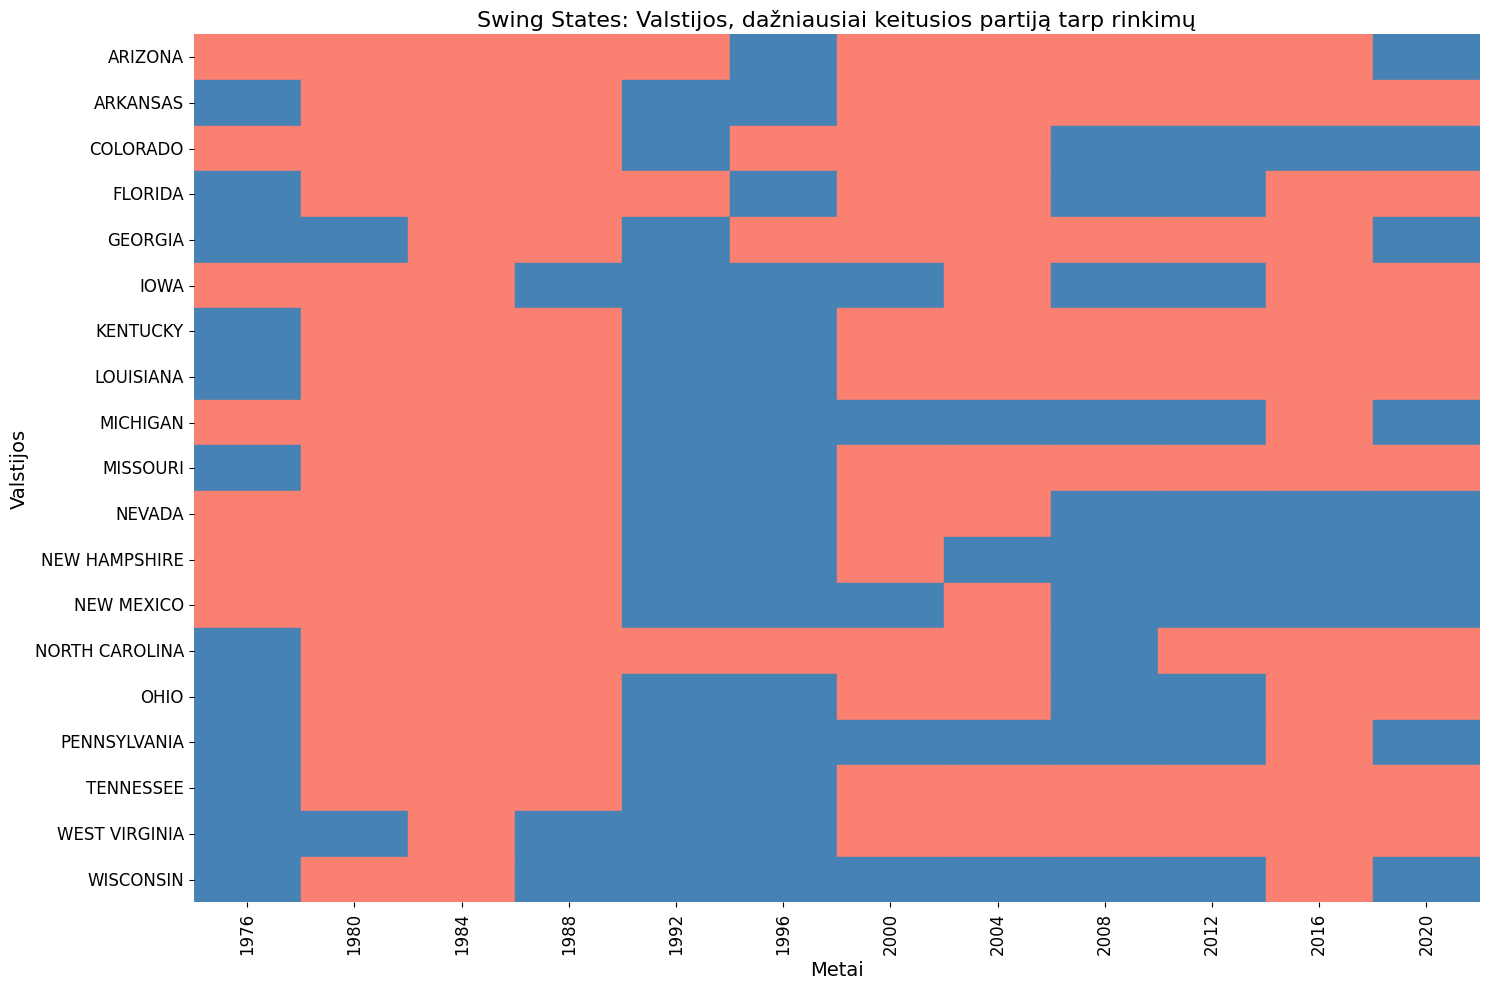

In [54]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Grupavimas pagal valstijas ir metus, nustatant laimėtoją
state_winners = prezidento_duomenys.loc[
    prezidento_duomenys.groupby(["state", "year"])["candidatevotes"].idxmax()
][["state", "year", "party_simplified"]]

# Sukuriame lentelę su valstijomis ir jų laimėtojomis partijomis per metus
pivot_winners = state_winners.pivot(index="state", columns="year", values="party_simplified")

# Identifikuojame valstijas, kurios pakeitė partiją tarp rinkimų
swing_states = pivot_winners.fillna("NONE").apply(lambda row: row != row.shift(), axis=1)

# Suskaičiuojame, kiek kartų kiekviena valstija pakeitė partiją
state_switch_count = swing_states.sum(axis=1)

# Pasirenkame tik valstijas, kurios dažniausiai keitė savo pasirinkimą
frequent_swing_states = state_switch_count[state_switch_count > state_switch_count.median()].index
swing_state_data = pivot_winners.loc[frequent_swing_states]

# Sukuriame spalvų žemėlapį partijoms
party_colors = {
    "DEMOCRAT": "steelblue",
    "REPUBLICAN": "salmon",
    "OTHER": "gray",
    "NONE": "white"
}

# Naudojame `map` metodą, kad priskirtume spalvas tiesiai DataFrame langeliams
heatmap_colors = swing_state_data.fillna("NONE").applymap(party_colors.get)

# Braižome šilumos žemėlapį
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
    swing_state_data.notna(),  # Naudojame TRUE/FALSE formatą heatmap struktūrai
    cmap=mcolors.ListedColormap(list(party_colors.values())),
    cbar=False,
    linewidths=0.5,
    linecolor="gray",
    xticklabels=swing_state_data.columns,
    yticklabels=swing_state_data.index,
    ax=ax
)

# Užpildome langelius spalvomis
for y, row in enumerate(heatmap_colors.values):
    for x, cell_color in enumerate(row):
        ax.add_patch(plt.Rectangle((x, y), 1, 1, color=cell_color))

# Grafiko detalės
plt.title("Swing States: Valstijos, dažniausiai keitusios partiją tarp rinkimų", fontsize=16)
plt.xlabel("Metai", fontsize=14)
plt.ylabel("Valstijos", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


Florida, Ohio, Pennsylvania, ir Michigan išsiskiria kaip svarbiausios „swing states“. Šios valstijos dažnai lemia galutinį rinkimų rezultatą dėl savo didelio svorio „Electoral College“ sistemoje.

Wisconsin, New Hampshire, ir North Carolina taip pat yra tarp kintančių valstijų, kurios nuolat keičia partiją tarp rinkimų ciklų.

Florida ir Ohio parodė didelį nepastovumą. Pvz., Florida buvo Respublikonų pusėje 1980-aisiais, perėjo į Demokratų pusę 1990-ųjų pabaigoje, o vėliau vėl svyravo tarp abiejų partijų.

West Virginia ir Tennessee ilgą laiką buvo Demokratų palaikomos valstijos, bet nuo 2000-ųjų pastoviai tapo Respublikonų pusėje.

Pennsylvania ir Michigan ypač svarbios, nes 2016 metais jos nukrypo Respublikonų naudai, tačiau 2020 metais sugrįžo į Demokratų pusę.

Arizona ir Georgia, kurios istoriškai buvo Respublikonų valstijos, 2020 metais perėjo į Demokratų pusę, parodydamos naują politinį poslinkį.

Šios valstijos yra pagrindinės kovos vietos, kur kandidatai investuoja didelį dėmesį, laiką ir resursus rinkimų kampanijoms. Pvz., Florida ir Ohio dažniausiai laikomos „būtina laimėti“, norint pasiekti sėkmę nacionaliniu mastu.

Pastaraisiais metais naujos valstijos, tokios kaip Arizona ir Georgia, taip pat įgavo „swing states“ charakterį, rodydamos demografinius ir politinius pokyčius.

Ši diagrama padeda suprasti, kurios valstijos istoriškai labiausiai svyruoja tarp partijų, ir tai naudinga analizuojant rinkimų strategijas bei prognozuojant ateities rinkimus.

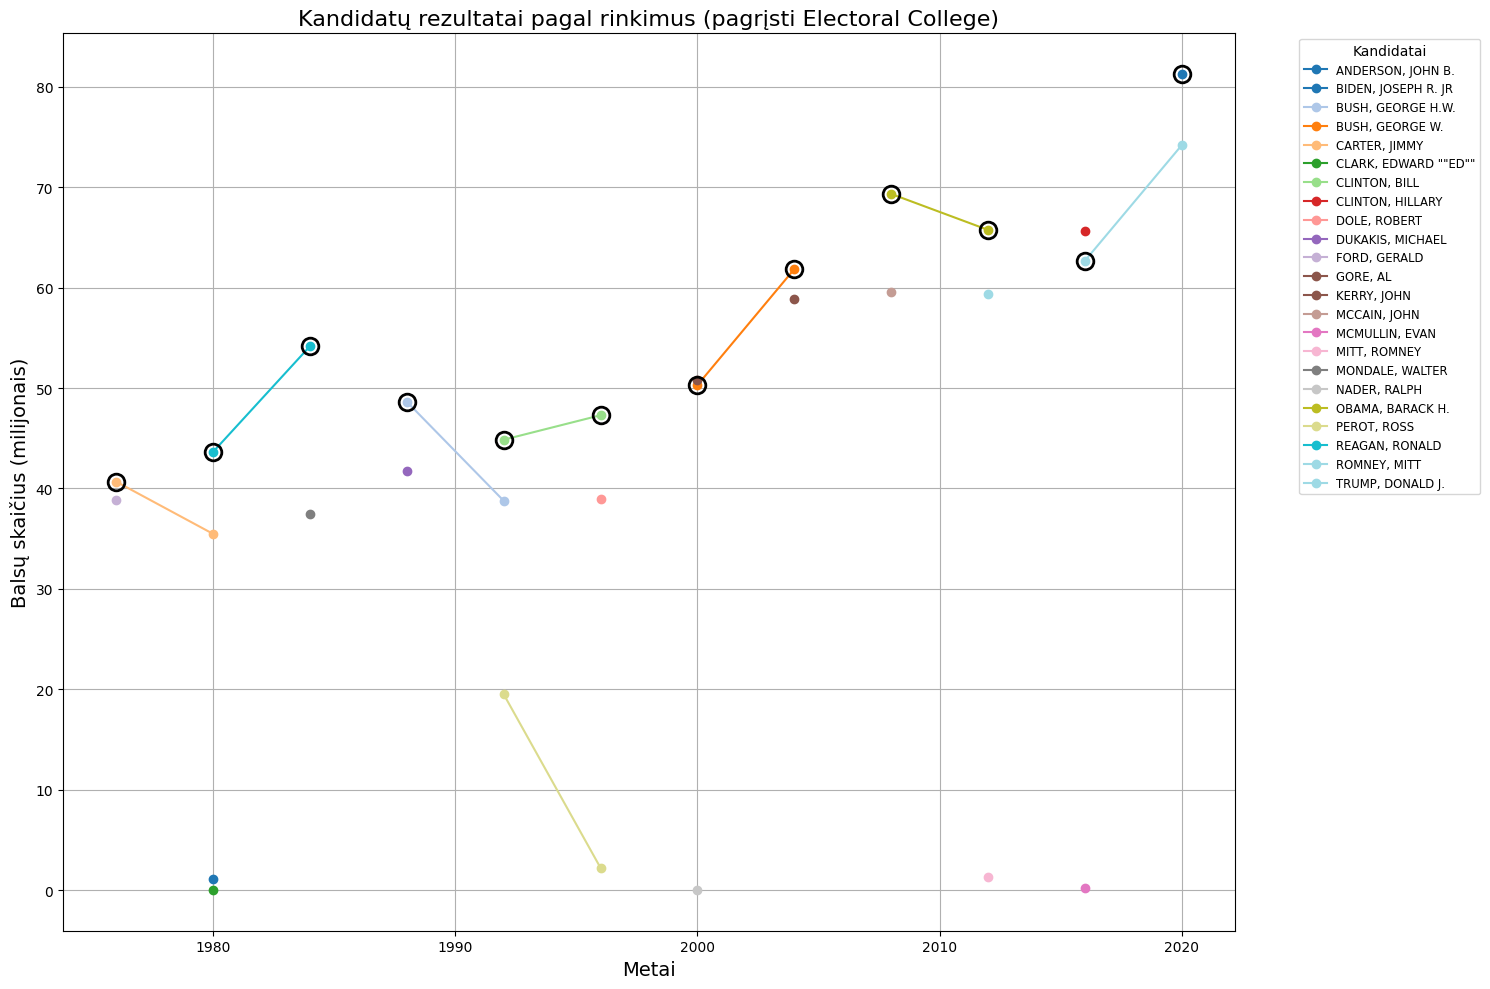

In [38]:
# Nustatome laimėtojus kiekvienoje valstijoje pagal „electoral_votes“
state_winners = prezidento_duomenys.loc[
    prezidento_duomenys.groupby(["state", "year"])["electoral_votes"].idxmax()
]

# Apskaičiuojame nacionalinį laimėtoją kiekvienais metais pagal suminius „electoral_votes“
national_winners = state_winners.groupby(["year", "candidate"], as_index=False).agg({
    "electoral_votes": "sum"
})
national_winners = national_winners.loc[national_winners.groupby("year")["electoral_votes"].idxmax()]

# Pridedame žymą „Winner“ nacionaliniams laimėtojams
prezidento_duomenys = prezidento_duomenys.merge(
    national_winners[["year", "candidate"]],
    on=["year", "candidate"],
    how="left",
    indicator=True
)
prezidento_duomenys["is_winner"] = (prezidento_duomenys["_merge"] == "both")
prezidento_duomenys.drop(columns=["_merge"], inplace=True)

# Filtruojame tik kandidatus, surinkusius daugiau nei 10% balsų
relevant_kandidatai = prezidento_duomenys[prezidento_duomenys["balsu_procentas"] >= 10]

# Grupavimas pagal metus ir kandidatus
kandidatu_tendencijos = relevant_kandidatai.groupby(["year", "candidate"])["candidatevotes"].sum().unstack()

# Pašaliname reikšmes su 0 (neaktyvūs kandidatai tais metais)
kandidatu_tendencijos = kandidatu_tendencijos.replace(0, pd.NA).dropna(axis=1, how="all")

# Kandidatai, kurie bent kartą surinko daugiau nei 10% balsų
galimi_kandidatai = kandidatu_tendencijos.columns[kandidatu_tendencijos.notna().any()]

# Braižome kandidatų rezultatus per kelis metus
spalvos = plt.get_cmap("tab20", len(galimi_kandidatai))
fig, ax = plt.subplots(figsize=(15, 10))

# Nubraižome kiekvieno kandidato liniją
for idx, kandidatas in enumerate(galimi_kandidatai):
    ax.plot(kandidatu_tendencijos.index, kandidatu_tendencijos[kandidatas] / 1e6, label=kandidatas, marker="o", color=spalvos(idx))

# Pažymime nacionalinius laimėtojus pagal „electoral_votes“
for _, eilute in national_winners.iterrows():
    metai = eilute["year"]
    kandidatas = eilute["candidate"]
    if kandidatas in galimi_kandidatai:
        ax.plot(metai, kandidatu_tendencijos.loc[metai, kandidatas] / 1e6, marker="o", markersize=12,
                markerfacecolor="none", markeredgewidth=2, markeredgecolor="black")

# Pakeičiame Y ašies formatą, kad rodytų milijonus be visų nulių
def format_milijonais(x, _):
    return f"{int(x)}"  # Rodome tik milijonų skaičių ir pridedame „M“

ax.yaxis.set_major_formatter(FuncFormatter(format_milijonais))

# Nustatome grafiko pavadinimą ir žymas
plt.title("Kandidatų rezultatai pagal rinkimus (pagrįsti Electoral College)", fontsize=16)
plt.xlabel("Metai", fontsize=14)
plt.ylabel("Balsų skaičius (milijonais)", fontsize=14)
plt.grid(True)

# Sukuriame legendą
plt.legend(title="Kandidatai", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
plt.tight_layout()
plt.show()

Grafike matome, kaip keitėsi kandidatų balsų skaičius per skirtingus rinkimus. Pavyzdžiui, per paskutinius dešimtmečius pastebima aiški balsų didėjimo tendencija, kas gali būti siejama su augančia rinkėjų populiacija ir didėjančiu rinkimų aktyvumu.

Laimėtojai (pažymėti juodais apskritimais) atspindi kandidatus, kurie surinko daugiausiai rinkikų kolegijos balsų tais metais. Tai leidžia aiškiai identifikuoti, kurie kandidatai buvo sėkmingi ne tik pagal populiarųjį balsavimą, bet ir pagal rinkikų kolegijos balsus.

Kai kurie kandidatai (pvz., Hillary Clinton 2016 m.) turėjo didelį populiarųjį palaikymą, bet nepakankamai rinkikų kolegijos balsų. Tokie rezultatai rodo skirtumą tarp populiaraus balsavimo ir rinkimų sistemos.

Kai kurie kandidatai, tokie kaip Ross Perot (1992 m.), nors ir nepriklausę dviem pagrindinėms partijoms, surinko reikšmingą dalį balsų. Tai parodo, kaip trečiosios partijos ar nepriklausomi kandidatai gali paveikti rinkimų rezultatą.

Šis grafikas aiškiai parodo prezidento rinkimų tendencijas ir dinamiką JAV. Grafike atsispindi kaip rinkikų kolegija formuoja rinkimų rezultatus.

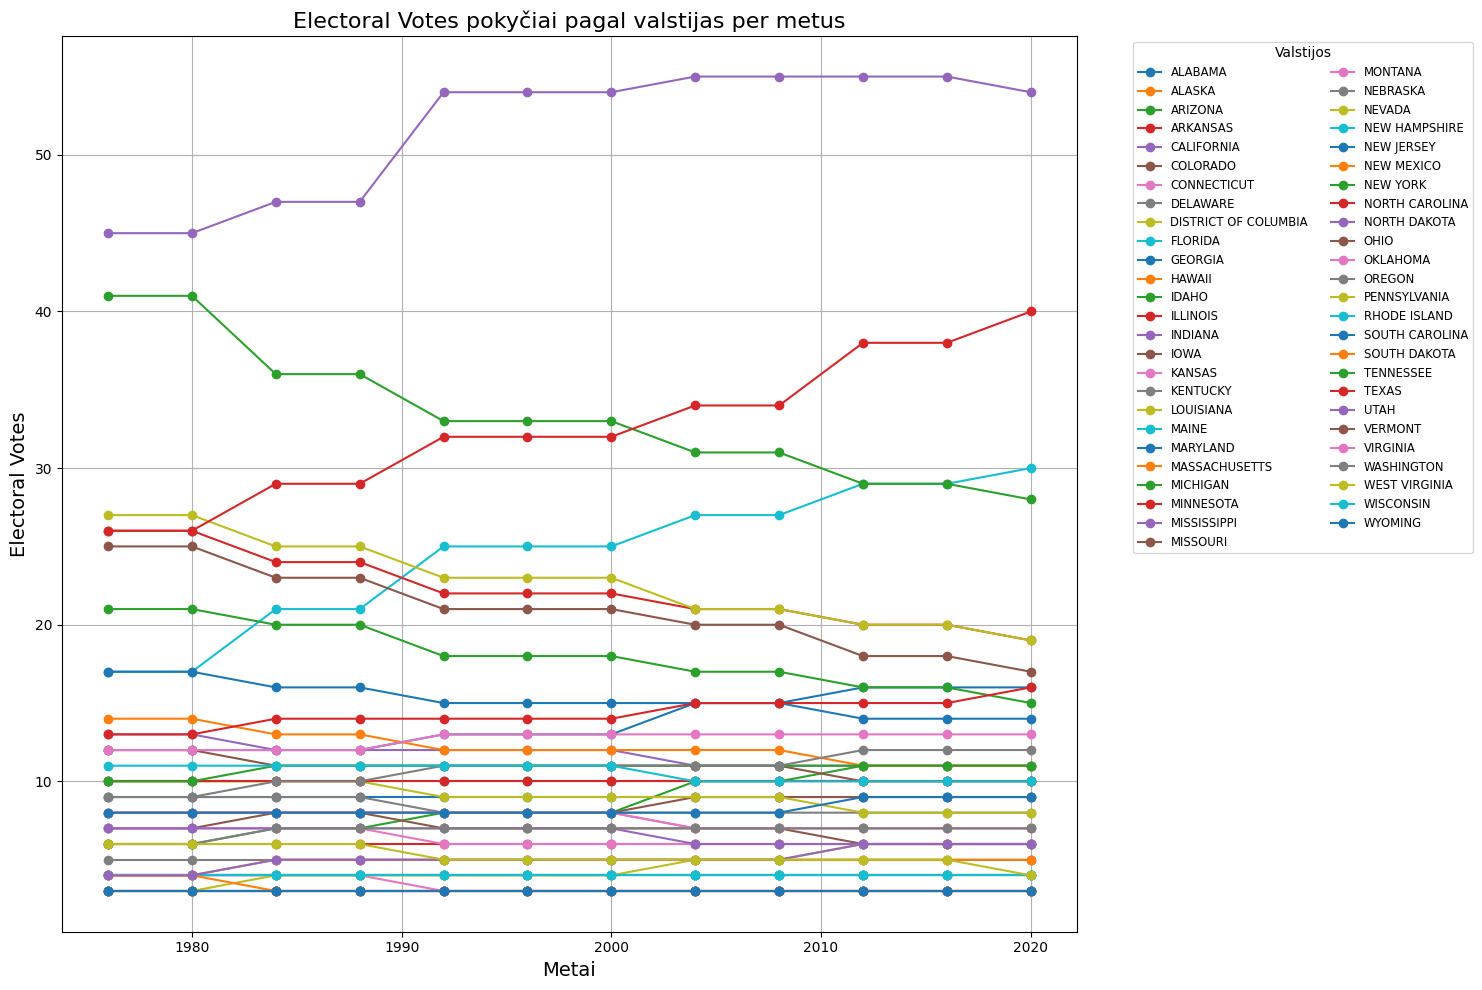

In [35]:
# Grupavimas pagal metus ir valstijas, kad nustatytume electoral_votes pokyčius
state_electoral_trends = prezidento_duomenys.groupby(["year", "state"])["electoral_votes"].max().unstack()

# Braižome electoral_votes pokyčius per metus pagal valstijas
def braizyti_electoral_votes_pokycius(state_electoral_trends):
    plt.figure(figsize=(15, 10))
    for state in state_electoral_trends.columns:
        plt.plot(state_electoral_trends.index, state_electoral_trends[state], label=state, linestyle="-", marker="o")

    # Grafiko detalės
    plt.title("Electoral Votes pokyčiai pagal valstijas per metus", fontsize=16)
    plt.xlabel("Metai", fontsize=14)
    plt.ylabel("Electoral Votes", fontsize=14)
    plt.legend(title="Valstijos", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small", ncol=2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

braizyti_electoral_votes_pokycius(state_electoral_trends)

Kai kurios valstijos, tokios kaip Kalifornija, Teksasas, ir Niujorkas, turi didžiausius „electoral votes“ dėl jų didesnės populiacijos. Šios valstijos atlieka esminį vaidmenį prezidento rinkimuose.

Kalifornija rodo didėjimą iki maždaug 55 „electoral votes“, o tai rodo jos didėjantį gyventojų skaičių per metus.

Grafikas parodo, kaip persiskirstymo procesai paveikė „electoral votes“ kai kuriose valstijose:
Niujorkas ir Pensilvanija prarado keletą „electoral votes“, tikriausiai dėl gyventojų sumažėjimo arba lėtesnio augimo, palyginti su kitomis valstijomis.

Floridos „electoral votes“ didėja, rodydami greitą gyventojų augimą.

Valstijos su mažais gyventojų skaičiais, tokios kaip Vermontas, Vajomingas ar Montana, turi stabilų ir mažą „electoral votes“ kiekį (paprastai 3–4).

Grafike matyti, kad po kiekvieno JAV surašymo (pvz., 1980, 1990, 2000, 2010 m.) įvyksta reikšmingi „electoral votes“ pokyčiai, nes remiantis surašymo rezultatais perskirstomi balsai. Pvz., Teksasas nuo 1980 m. padidino savo „electoral votes“ iki daugiau nei 30, o Niujorkas sumažino.

„Electoral votes“ suma išlieka pastovi – 538. Tai reiškia, kad kai kurios valstijos padidino balsų skaičių kitų valstijų sąskaita.

Valstijos, turinčios daug „electoral votes“, daro lemiamą įtaką rinkimams. Pvz., Kalifornija ar Teksasas gali nulemti rinkimų baigtį.

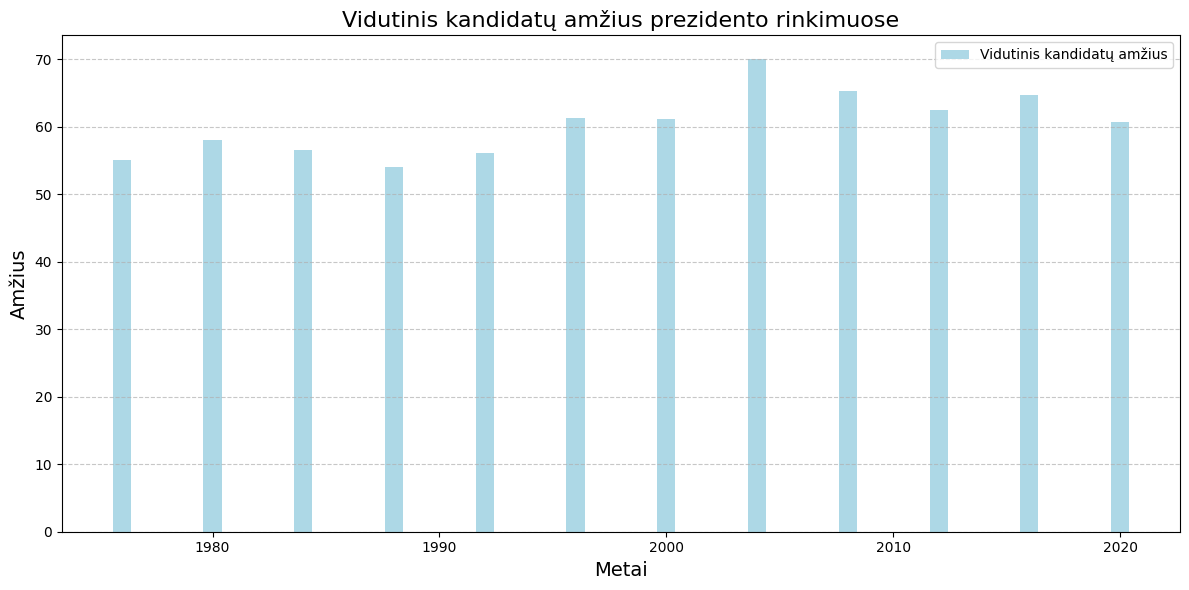

In [ ]:
# Grupavimas pagal metus ir apskaičiuojamas vidutinis amžius
vidutinis_amzius = prezidento_duomenys.groupby("year")["amžius"].mean()

# Braižome stulpelinę diagramą
plt.figure(figsize=(12, 6))

# Stulpeliai vidutiniam kandidatų amžiui
plt.bar(vidutinis_amzius.index, vidutinis_amzius.values, color="lightblue", label="Vidutinis kandidatų amžius")

# Pavadinimai ir žymos
plt.title("Vidutinis kandidatų amžius prezidento rinkimuose", fontsize=16)
plt.xlabel("Metai", fontsize=14)
plt.ylabel("Amžius", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Nuo 1990 m. vidutinis kandidatų amžius pradėjo pastebimai augti, pasiekdamas aukščiausią tašką apie 2008–2012 metus.

Tai rodo, kad prezidento rinkimuose per pastaruosius dešimtmečius dalyvavo vis vyresni kandidatai.

2010–2012 m. laikotarpiu vidutinis amžius pasiekė aukščiausią tašką (virš 70 metų). Tai siejama su tuo, kad abi pagrindinės partijos (Demokratai ir Respublikonai) iškėlė vyresnius kandidatus.

2020 metais pastebimas kandidato amžiaus sumažėjimas, tačiau jis vis tiek išlieka didesnis nei 1970-ųjų ir 1980-ųjų laikotarpiu.

1976–1992 metais kandidatų amžius buvo santykinai stabilus ir svyravo tarp 54–58 metų.

Amžiaus pokyčiai gali būti susiję su visuomenės prioritetais: jaunesni kandidatai gali atspindėti permainų norą, o vyresni – stabilumo siekį.